In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rebound

color1 = '#6666cc'
color2 = '#cc66cc'
color3 = '#cc6666'
color4 = '#cccc66'
color5 = '#66cc66'

%matplotlib inline

# Función para calcular la órbita

In [2]:
def orbita(m,a,e,inc,Omega,omega,f):
    
    # Características de la simulación
    sim = rebound.Simulation()
    sim.units = ('AU', 'yr', 'Msun')   # Unidades que queremos usar
    sim.integrator = "whfast"          # Integrador de REBOUND
    sim.dt = 0.001                     # Tamaño del paso de integración
    tmax = a**(3./2.)                  # Tiempo de la sim (periodo orbital)
    N = 1000                           # Número de salidas
    tiempos = np.linspace(0., tmax, N) # Momentos en que generará las salidas
    
    # Objetos en la simulación
    sim.add(m=1.0)  # Estrella
    sim.add(m=m,a=a,e=e,inc=inc,Omega=Omega,omega=omega,f=f)

    # Arreglos para la info
    t = []
    xPlaneta, yPlaneta, zPlaneta = [],[],[]
    
    # Haciendo la integración
    for i,tiempo in enumerate(tiempos):
    
        sim.integrate(tiempo)
        t.append(tiempo)

        j = 0
        for p in sim.particles:
            if j == 1: 
                xPlaneta.append(p.x)
                yPlaneta.append(p.y)
                zPlaneta.append(p.z)
            j = j + 1
        
    return xPlaneta, yPlaneta, zPlaneta 

# Ejemplo 
## Aplicando la función

In [3]:
orb_A = orbita(m = 3*10**-6, a = 1.0, e = 0.0, inc = 0.0, Omega = 0.0, omega = 0.0, f = 0.0)
x_A, y_A, z_A = orb_A[0], orb_A[1], orb_A[2]

orb_B = orbita(m = 3*10**-6, a = 1.0, e = 0.2, inc = np.pi/12., Omega = 0.0, omega = 0.0, f = 0.0)
x_B, y_B, z_B = orb_B[0], orb_B[1], orb_B[2]

orb_C = orbita(m = 3*10**-6, a = 1.0, e = 0.4, inc = 2*np.pi/12., Omega = 0.0, omega = 0.0, f = 0.0)
x_C, y_C, z_C = orb_C[0], orb_C[1], orb_C[2]

orb_D = orbita(m = 3*10**-6, a = 1.0, e = 0.6, inc = 3*np.pi/12., Omega = 0.0, omega = 0.0, f = 0.0)
x_D, y_D, z_D = orb_D[0], orb_D[1], orb_D[2]

orb_E = orbita(m = 3*10**-6, a = 1.0, e = 0.8, inc = 4*np.pi/12., Omega = 0.0, omega = 0.0, f = 0.0)
x_E, y_E, z_E = orb_E[0], orb_E[1], orb_E[2]

## Plot 2D

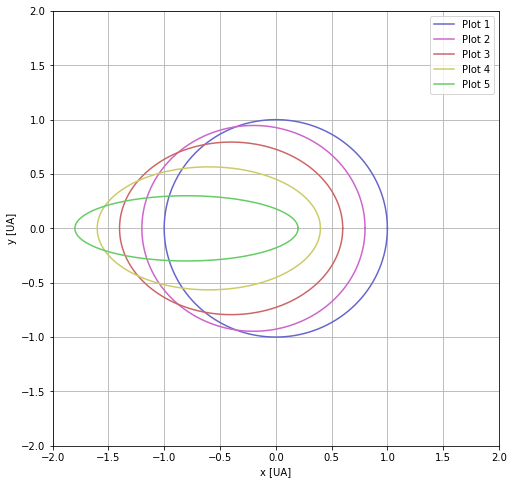

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

ax.grid(True)

ax.plot(x_A, y_A, label = 'Plot 1', color = color1)
ax.plot(x_B, y_B, label = 'Plot 2', color = color2)
ax.plot(x_C, y_C, label = 'Plot 3', color = color3)
ax.plot(x_D, y_D, label = 'Plot 4', color = color4)
ax.plot(x_E, y_E, label = 'Plot 5', color = color5)

ax.legend(loc = 'best')
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')

plt.savefig('plot2D.pdf',bbox_inches='tight');

## Plot 3D

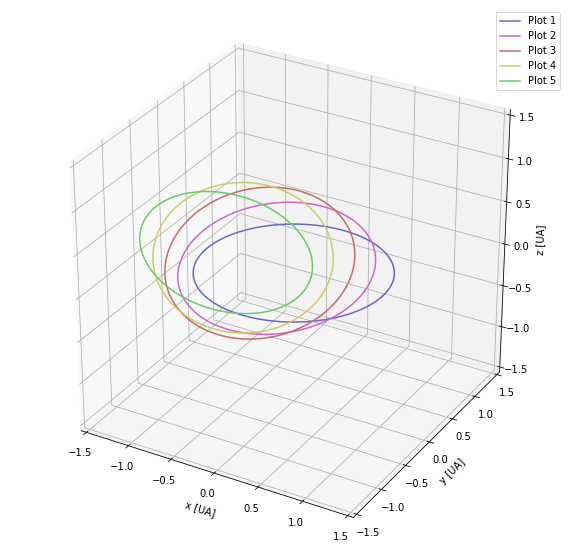

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

ax.plot(x_A, y_A, z_A, label = 'Plot 1', color = color1)
ax.plot(x_B, y_B, z_B, label = 'Plot 2', color = color2)
ax.plot(x_C, y_C, z_C, label = 'Plot 3', color = color3)
ax.plot(x_D, y_D, z_D, label = 'Plot 4', color = color4)
ax.plot(x_E, y_E, z_E, label = 'Plot 5', color = color5)

ax.legend(loc = 'best')
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')
ax.set_zlabel('z [UA]')

plt.savefig('plot3D.pdf',bbox_inches='tight');